# Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/AOBD_Project"
path

'/content/drive/My Drive/AOBD_Project'

# Import libraries

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import tensorflow as tf

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [ ]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


# EDA

In [ ]:
df = pd.read_csv(path +"/WildBlueberry.csv")
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [ ]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [ ]:
print(df.shape)

(777, 18)


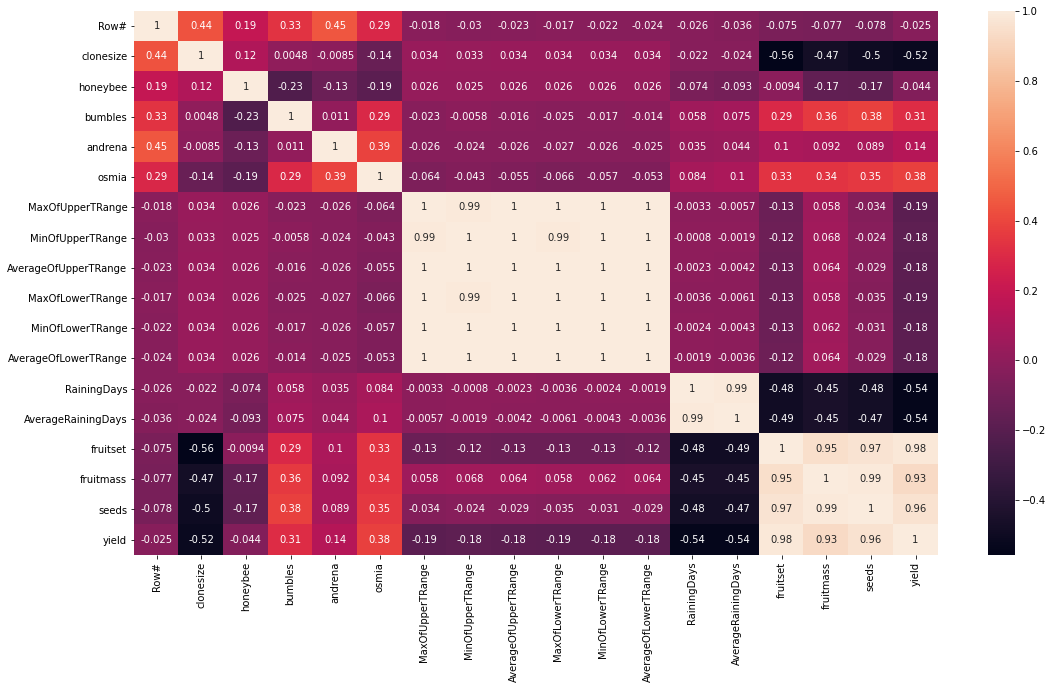

In [ ]:
# correlation matrix

import seaborn as sns
plt.figure(figsize=(18,10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()
#corr.unstack().sort_values()

In [ ]:
# round of the state and actions

df["fruitset_new"]=df['fruitset'].apply(lambda x: round(x, 1))
df.head()
df["fruitmass_new"]=df['fruitmass'].apply(lambda x: round(x, 1))
df.head()
df["seeds_new"]=df['seeds'].apply(lambda x: round(x, 1))
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,fruitset_new,fruitmass_new,seeds_new
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795,0.4,0.4,31.7
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663,0.4,0.4,33.4
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965,0.4,0.4,30.5
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030,0.4,0.4,31.6
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543,0.4,0.4,28.9


In [ ]:
# total how many different actions are there
print("Actions: ", df['fruitset_new'].unique())

# total how many different state are there
print("States: ", df['fruitmass_new'].unique())

Actions:  [0.4 0.3 0.2 0.5 0.6 0.7]
States:  [0.4 0.3 0.5]




```
# This is formatted as code
```

# DNN to classify actions

In [ ]:
selected_columns = df[["fruitmass_new","fruitset_new","yield","seeds_new"]]
#Index into desired columns to copy

data = selected_columns.copy()
data.head()

,fruitmass_new,fruitset_new,yield,seeds_new
0,0.4,0.4,3813.165795,31.7
1,0.4,0.4,4947.605663,33.4
2,0.4,0.4,3866.798965,30.5
3,0.4,0.4,4303.943030,31.6
4,0.4,0.4,3436.493543,28.9


In [ ]:
# encoding the categorical values

one_hot_encoded = pd.get_dummies(data["fruitset_new"])
data = data.drop("fruitset_new",axis=1)
data = data.join(one_hot_encoded)
data.rename(columns={0.3:'action_0.3', 0.4:'action_0.4', 0.5:'action_0.5', 0.2:'action_0.2', 0.6:'action_0.6', 0.7:'action_0.7'}, inplace=True)

one_hot_encoded_1 = pd.get_dummies(data["fruitmass_new"])
data = data.drop("fruitmass_new",axis=1)
data = data.join(one_hot_encoded_1)
data.head()
data.rename(columns={0.3:'state_0.3', 0.4:'state_0.4', 0.5:'state_0.5'}, inplace=True)

In [ ]:
data.head()

,yield,seeds_new,action_0.2,action_0.3,action_0.4,action_0.5,action_0.6,action_0.7,state_0.3,state_0.4,state_0.5
0,3813.165795,31.7,0,0,1,0,0,0,0,1,0
1,4947.605663,33.4,0,0,1,0,0,0,0,1,0
2,3866.798965,30.5,0,0,1,0,0,0,0,1,0
3,4303.943030,31.6,0,0,1,0,0,0,0,1,0
4,3436.493543,28.9,0,0,1,0,0,0,0,1,0


In [ ]:
# splitting data to train and test

X = data[['seeds_new', 'state_0.3',	'state_0.4',	'state_0.5']]
y = data[['action_0.2',	'action_0.3',	'action_0.4',	'action_0.5',	'action_0.6',	'action_0.7']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(X_test.shape)

(543, 4)
(234, 4)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(543, 6)
(234, 6)


In [ ]:
# making the sequential model

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=4))
model.add(Dense(6, activation='softmax'))

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['accuracy'])

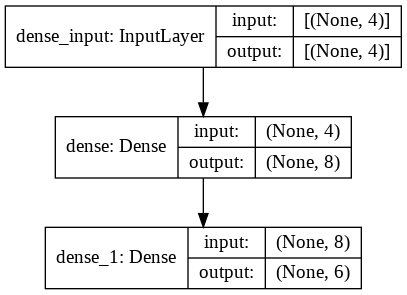

In [ ]:
# visualizing the layers

from keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [ ]:
# build the model

model.fit(X_train, y_train, epochs=1000, batch_size=128)

In [ ]:
# predictions on the trained model

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.7255985140800476 
 Error on training data: 0.2744014859199524
Accuracy on test data: 0.7307692170143127 
 Error on test data: 0.26923078298568726


## Save the model

In [ ]:
# pickle the classification file

from keras.models import load_model
model.save('/content/drive/My Drive/clf_model.h5')

loaded_model = load_model('/content/drive/My Drive/clf_model.h5')
loaded_model

In [ ]:
y_test = pd.DataFrame(y_test)
pred_test = pd.DataFrame(pred_test)
for i in range(5):
  print("Actual: \n{}  =>\n\n predicted: \n{}".format(y_test.iloc[i], pred_test.iloc[i]))

Actual: 
action_0.2    0
action_0.3    0
action_0.4    0
action_0.5    0
action_0.6    1
action_0.7    0
Name: 319, dtype: uint8  =>

 predicted: 
0    0.000573
1    0.001929
2    0.000535
3    0.404658
4    0.589985
5    0.002320
Name: 0, dtype: float32
Actual: 
action_0.2    0
action_0.3    0
action_0.4    0
action_0.5    1
action_0.6    0
action_0.7    0
Name: 685, dtype: uint8  =>

 predicted: 
0    0.000764
1    0.002473
2    0.000791
3    0.433862
4    0.559340
5    0.002770
Name: 1, dtype: float32
Actual: 
action_0.2    0
action_0.3    0
action_0.4    0
action_0.5    0
action_0.6    1
action_0.7    0
Name: 284, dtype: uint8  =>

 predicted: 
0    0.000311
1    0.001133
2    0.000234
3    0.345410
4    0.651332
5    0.001580
Name: 2, dtype: float32
Actual: 
action_0.2    0
action_0.3    0
action_0.4    0
action_0.5    1
action_0.6    0
action_0.7    0
Name: 144, dtype: uint8  =>

 predicted: 
0    0.005394
1    0.009616
2    0.263312
3    0.706854
4    0.011677
5    0.003147
Name

In [ ]:
# concatenate actions with X

actions = np.concatenate((pred_train, pred_test))
actions = pd.DataFrame(actions)

In [ ]:
state_action = pd.concat([data,actions],axis=1,ignore_index=2)

In [ ]:
state_action.head(9)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3813.165795,31.7,0,0,1,0,0,0,0,1,0,0.000212,0.000813,0.000140,0.311233,0.686361,0.001241
1,4947.605663,33.4,0,0,1,0,0,0,0,1,0,0.005006,0.009116,0.231003,0.738723,0.013051,0.003101
2,3866.798965,30.5,0,0,1,0,0,0,0,1,0,0.006437,0.010808,0.368639,0.602713,0.008233,0.003170
3,4303.943030,31.6,0,0,1,0,0,0,0,1,0,0.007329,0.011508,0.501701,0.471271,0.005205,0.002986
4,3436.493543,28.9,0,0,1,0,0,0,0,1,0,0.000136,0.000553,0.000077,0.274451,0.723847,0.000936
5,2825.003738,27.3,0,1,0,0,0,0,0,1,0,0.000707,0.002311,0.000711,0.425865,0.567765,0.002640
6,2625.269164,26.1,0,1,0,0,0,0,0,1,0,0.000109,0.000455,0.000057,0.257079,0.741490,0.000810
7,2379.905214,25.0,1,0,0,0,0,0,1,0,0,0.000264,0.000983,0.000188,0.330555,0.666584,0.001426
8,4234.868585,32.3,0,0,1,0,0,0,0,1,0,0.005071,0.009202,0.236193,0.733608,0.012816,0.003110


In [ ]:
state_action.shape

(777, 17)

# Yield Prediction 

In [ ]:
# splitting the data into train and test
X = state_action.iloc[: ,1:16] 

y = data.iloc[:,0].values

X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X, y, test_size=0.30, random_state=0)
print(X_train_yield.shape); print(X_test_yield.shape)

(543, 15)
(234, 15)


In [ ]:
# save the file as pickle
import pickle

with open('/content/drive/My Drive/x_pickle.pkl', 'wb') as handle:
    pickle.dump(X, handle)

with open('/content/drive/My Drive/x_pickle.pkl', 'rb') as handle:
    X_df = pickle.load(handle)

In [ ]:
print(y_train_yield.shape)
print(y_test_yield.shape)

(543,)
(234,)


In [ ]:
# ANN for finding best reward

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation='relu',random_state=1,max_iter=2000, batch_size = 200).fit(X_train_yield,y_train_yield)

y_pred_yield = reg.predict(X_test_yield)
print(r2_score(y_pred_yield,y_test_yield))

0.9338479417257398


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred_yield,y_test_yield,  squared=False))

336.2125395024398


In [ ]:
t = y_test_yield.max()
print(t)
np.where(y_test_yield == t)
X_test_yield.iloc[85]

8711.208961


1     45.500000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      1.000000
7      0.000000
8      0.000000
9      0.000000
10     1.000000
11     0.000328
12     0.001187
13     0.000251
14     0.350425
15     0.646173
Name: 356, dtype: float64

In [ ]:
s = y_pred_yield.max()
print(s)
np.where(y_pred_yield == s)
X_test_yield.iloc[8]

8505.132135926997


1     46.600000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      1.000000
7      0.000000
8      0.000000
9      0.000000
10     1.000000
11     0.000264
12     0.000983
13     0.000188
14     0.330555
15     0.666584
Name: 767, dtype: float64

## Pickling the file

In [ ]:
with open('/content/drive/My Drive/reg_model.pkl', 'wb') as handle:
    pickle.dump(reg, handle)

with open('/content/drive/My Drive/reg_model.pkl', 'rb') as handle:
    testing_model = pickle.load(handle)

testing_model.predict(X_test_yield)
print(r2_score(y_pred_yield,y_test_yield))

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred_yield,y_test_yield,  squared=False))

0.9338479417257398
336.2125395024398


In [ ]:
y_pred_yield = pd.Series(y_pred_yield)
y_test_yield = pd.Series(y_test_yield)

for i in range(234):
  print(y_test_yield.iloc[i] - y_pred_yield.iloc[i])
# y_pred.sort_values(ascending=False)

In [ ]:
# making a data frame from actual and predicted values
final_test_pred = pd.concat([y_test_yield,y_pred_yield], axis=1)
final_test_pred.columns = "Actual_Yield", "Predicted_Yield" 
final_test_pred.head()

final_test_pred.to_csv("/content/drive/My Drive/AOBD_Project/final_test_pred.csv", index=False)
# pd.read_csv("/content/drive/My Drive/final_test_pred.csv")

In [ ]:
for i in range(5):
  print("Actual action: \n{}  =>\n\n predicted action: \n{} \nActual yield: {}  => predicted yield: {}".format(y_test.iloc[i], pred_test.iloc[i],y_test_yield[i], y_pred_yield[i]))

# for i in range(5):
  # print("Actual action: \n{}  =>\n\n predicted action: \n{}".format(y_test.iloc[i], pred_test.iloc[i]))  

Actual action: 
action_0.2    0
action_0.3    0
action_0.4    0
action_0.5    0
action_0.6    1
action_0.7    0
Name: 319, dtype: uint8  =>

 predicted action: 
0    0.000573
1    0.001929
2    0.000535
3    0.404658
4    0.589985
5    0.002320
Name: 0, dtype: float32 
Actual yield: 6795.881873  => predicted yield: 7079.638875574272
Actual action: 
action_0.2    0
action_0.3    0
action_0.4    0
action_0.5    1
action_0.6    0
action_0.7    0
Name: 685, dtype: uint8  =>

 predicted action: 
0    0.000764
1    0.002473
2    0.000791
3    0.433862
4    0.559340
5    0.002770
Name: 1, dtype: float32 
Actual yield: 4357.822918  => predicted yield: 4300.543519599305
Actual action: 
action_0.2    0
action_0.3    0
action_0.4    0
action_0.5    0
action_0.6    1
action_0.7    0
Name: 284, dtype: uint8  =>

 predicted action: 
0    0.000311
1    0.001133
2    0.000234
3    0.345410
4    0.651332
5    0.001580
Name: 2, dtype: float32 
Actual yield: 7293.53617  => predicted yield: 6451.438958747